In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
data = np.load('./50_2020.npy')
open_prices = data[:, 0]
close_prices = data[:, 1]
high_prices = data[:, 2]
low_prices = data[:, 3]
volume = data[:, 4]
trend = data[:, 5]

In [25]:
# 1. 统计分析 - 计算均值、中位数、标准差
open_mean = np.mean(open_prices)
close_mean = np.mean(close_prices)
high_mean = np.mean(high_prices)
low_mean = np.mean(low_prices)
volume_mean = np.mean(volume)

open_median = np.median(open_prices)
close_median = np.median(close_prices)
high_median = np.median(high_prices)
low_median = np.median(low_prices)
volume_median = np.median(volume)

open_std = np.std(open_prices)
close_std = np.std(close_prices)
high_std = np.std(high_prices)
low_std = np.std(low_prices)
volume_std = np.std(volume)

In [27]:
# 统计结果整理成 DataFrame
detailed_statistics = {
    "Metric": ["开盘价", "收盘价", "最高价", "最低价", "成交量"],
    "均值": [open_mean, close_mean, high_mean, low_mean, volume_mean],
    "中位数": [open_median, close_median, high_median, low_median, volume_median],
    "标准差": [open_std, close_std, high_std, low_std, volume_std],
}

# 转换为 DataFrame 并打印
detailed_statistics_df = pd.DataFrame(detailed_statistics)
print(detailed_statistics_df)

  Metric             均值           中位数            标准差
0    开盘价    3142.830234    3228.83640     295.690114
1    收盘价    3142.868354    3228.78840     295.693347
2    最高价    3143.714268    3230.07535     295.828344
3    最低价    3141.978899    3227.54325     295.547515
4    成交量  155901.876998  118035.00000  145468.154234


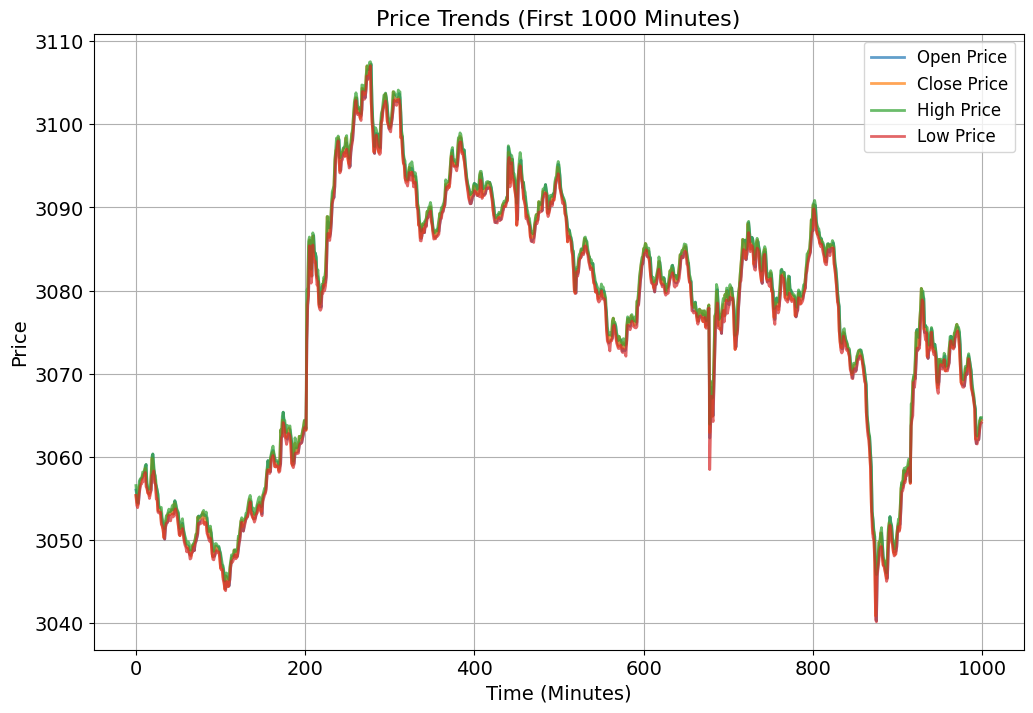

In [38]:
plt.rcParams.update({'font.size': 14})

# 2.1 折线图 - 显示开盘价、收盘价、最高价、最低价的趋势，前1000分钟
plt.figure(figsize=(12, 8))
plt.plot(open_prices[:1000], label='Open Price', linewidth=2, alpha=0.7)
plt.plot(close_prices[:1000], label='Close Price', linewidth=2, alpha=0.7)
plt.plot(high_prices[:1000], label='High Price', linewidth=2, alpha=0.7)
plt.plot(low_prices[:1000], label='Low Price', linewidth=2, alpha=0.7)
plt.title('Price Trends (First 1000 Minutes)', fontsize=16)
plt.xlabel('Time (Minutes)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

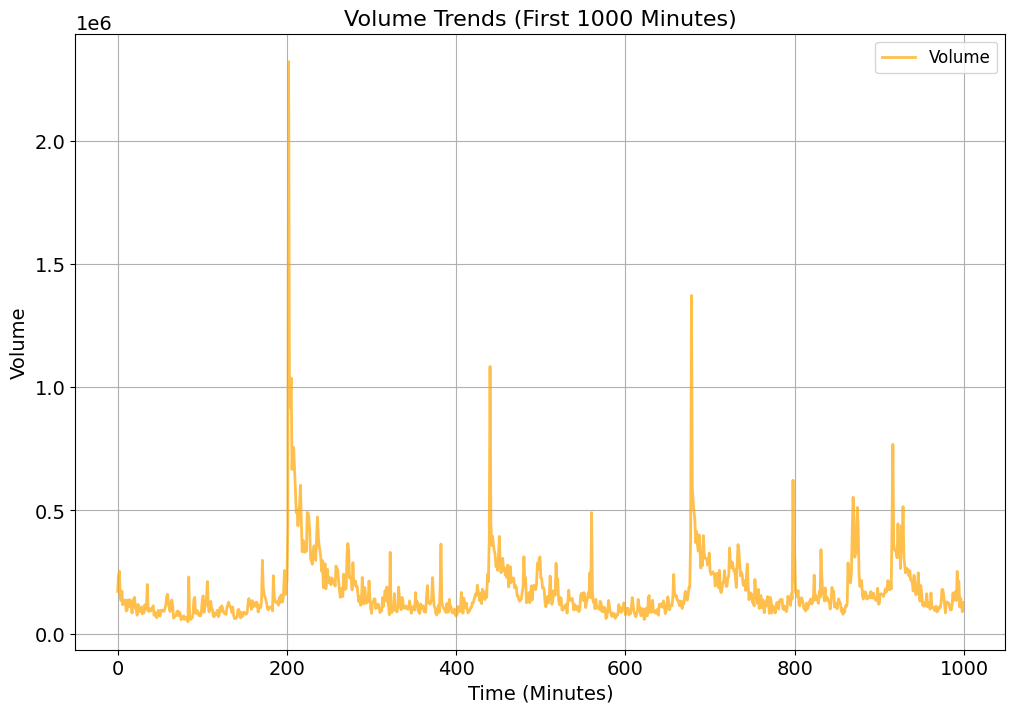

In [39]:
plt.figure(figsize=(12, 8))
plt.plot(volume[:1000], label='Volume', color='orange', linewidth=2, alpha=0.7)
plt.title('Volume Trends (First 1000 Minutes)', fontsize=16)
plt.xlabel('Time (Minutes)', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

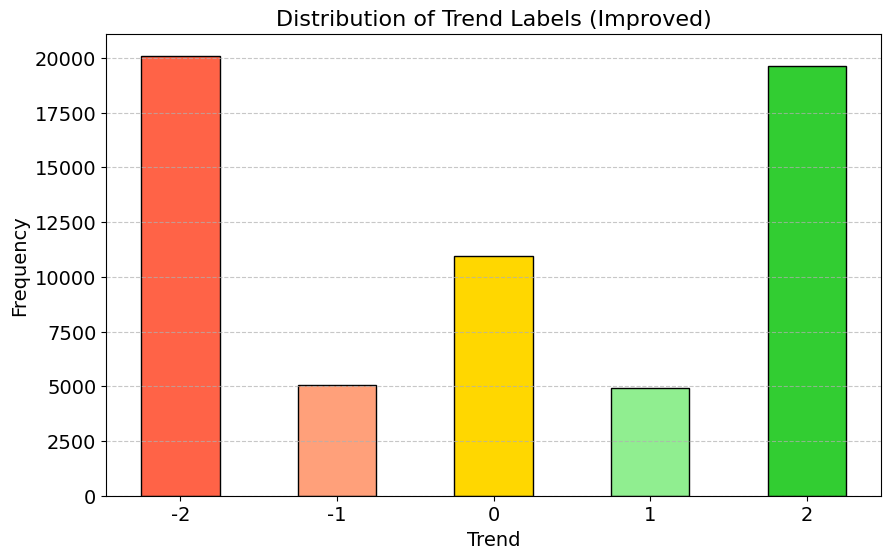

In [45]:
import matplotlib.pyplot as plt

# 2.3 涨跌趋势分布柱状图（美化版）
labels = ['-2', '-1', '0', '1', '2']
trend_counts = [np.sum(trend == -2), np.sum(trend == -1), np.sum(trend == 0), np.sum(trend == 1), np.sum(trend == 2)]

# 绘制美化后的柱状图，并调整颜色和柱宽
plt.figure(figsize=(10, 6))
plt.bar([-2, -1, 0, 1, 2], trend_counts, tick_label=labels, edgecolor='black', 
        color=['#FF6347', '#FFA07A', '#FFD700', '#90EE90', '#32CD32'], width=0.5)
plt.title('Distribution of Trend Labels (Improved)', fontsize=16)
plt.xlabel('Trend', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

                  Metric     Mean  Median      Max      Min
0  Open-Close Difference -0.03812 -0.0234  15.3499 -45.4051
1    High-Low Difference  1.73537  1.3351  45.5865   0.0000


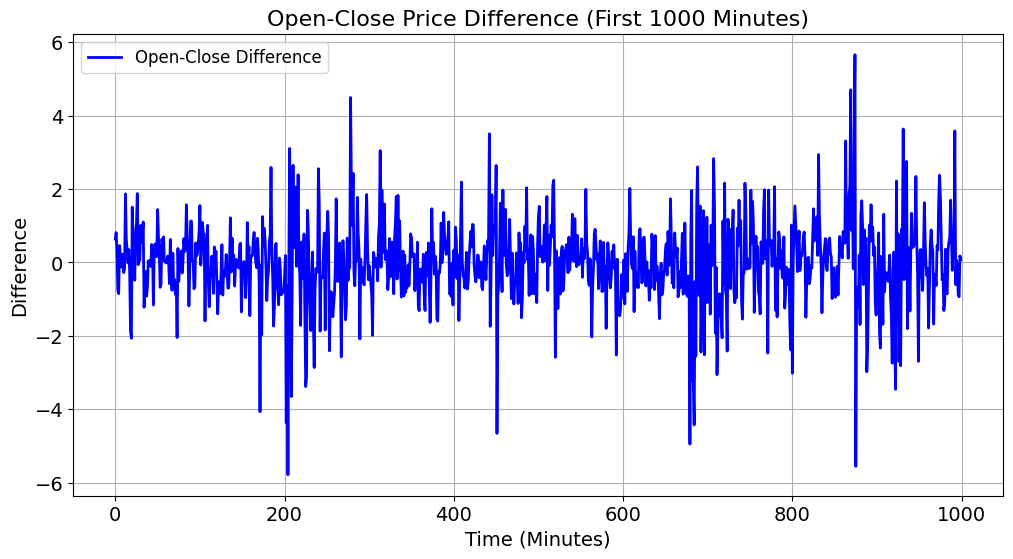

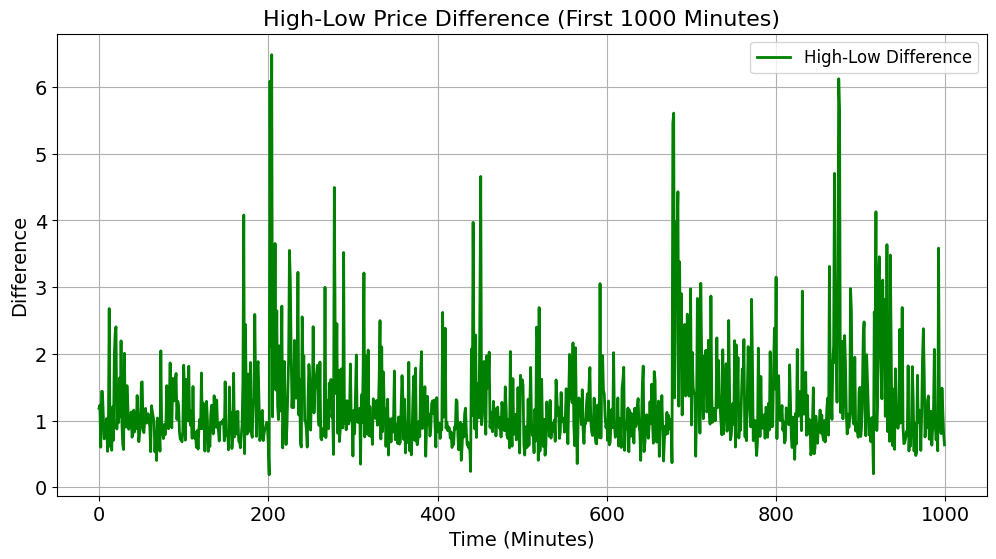

In [43]:
# 1. 差值计算
open_close_diff = open_prices - close_prices  # 开盘价与收盘价的差值
high_low_diff = high_prices - low_prices      # 最高价与最低价的差值

# 2. 差值的统计分析
open_close_mean = np.mean(open_close_diff)
high_low_mean = np.mean(high_low_diff)
open_close_median = np.median(open_close_diff)
high_low_median = np.median(high_low_diff)
open_close_max = np.max(open_close_diff)
high_low_max = np.max(high_low_diff)
open_close_min = np.min(open_close_diff)
high_low_min = np.min(high_low_diff)

# 差值统计结果整理成DataFrame
diff_statistics = {
    "Metric": ["Open-Close Difference", "High-Low Difference"],
    "Mean": [open_close_mean, high_low_mean],
    "Median": [open_close_median, high_low_median],
    "Max": [open_close_max, high_low_max],
    "Min": [open_close_min, high_low_min]
}

diff_statistics_df = pd.DataFrame(diff_statistics)

# 打印差值统计分析结果
print(diff_statistics_df)

# 3. 可视化差值的变化趋势

# 设置字体大小
plt.rcParams.update({'font.size': 14})

# 3.1 开盘价和收盘价差值的变化趋势
plt.figure(figsize=(12, 6))
plt.plot(open_close_diff[:1000], label='Open-Close Difference', color='blue', linewidth=2)
plt.title('Open-Close Price Difference (First 1000 Minutes)', fontsize=16)
plt.xlabel('Time (Minutes)', fontsize=14)
plt.ylabel('Difference', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

# 3.2 最高价和最低价差值的变化趋势
plt.figure(figsize=(12, 6))
plt.plot(high_low_diff[:1000], label='High-Low Difference', color='green', linewidth=2)
plt.title('High-Low Price Difference (First 1000 Minutes)', fontsize=16)
plt.xlabel('Time (Minutes)', fontsize=14)
plt.ylabel('Difference', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

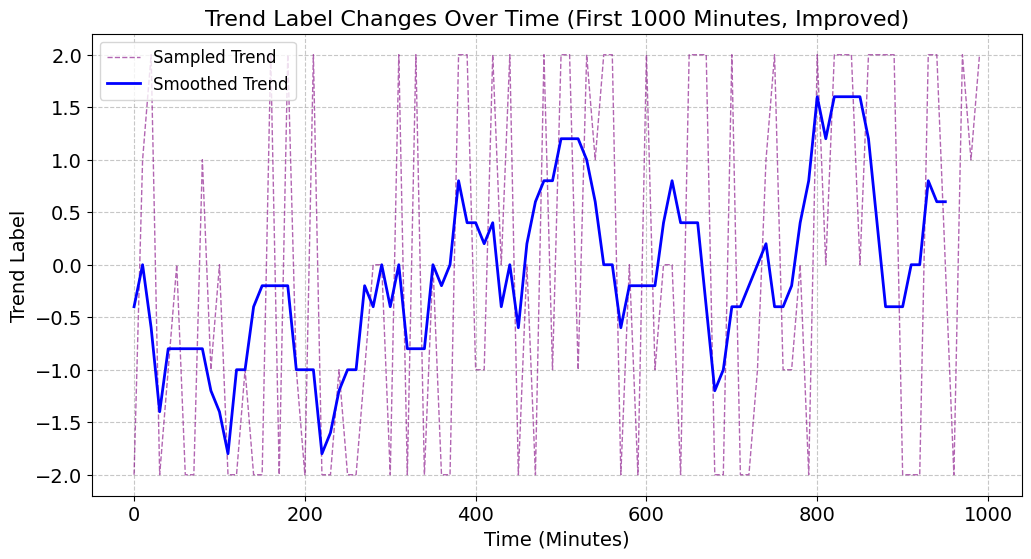

In [52]:
# 2.5 美化趋势涨跌标签随时间变化的图表

# 通过采样减少数据点的数量
sampling_interval = 10  # 选择每10个点进行采样
sampled_trend = trend[:1000:sampling_interval]
sampled_time = np.arange(0, 1000, sampling_interval)

# 平滑曲线，使用简单的移动平均
window_size = 5
smoothed_trend = np.convolve(sampled_trend, np.ones(window_size)/window_size, mode='valid')
smoothed_time = sampled_time[:len(smoothed_trend)]

# 绘制美化后的趋势变化图
plt.figure(figsize=(12, 6))
plt.plot(sampled_time, sampled_trend, label='Sampled Trend', color='purple', linewidth=1, alpha=0.6, linestyle='--')
plt.plot(smoothed_time, smoothed_trend, label='Smoothed Trend', color='blue', linewidth=2)

# 添加注释
plt.title('Trend Label Changes Over Time (First 1000 Minutes, Improved)', fontsize=16)
plt.xlabel('Time (Minutes)', fontsize=14)
plt.ylabel('Trend Label', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# 显示图表
plt.show()
